In [20]:
import seaborn as sns
import pandas as pd
import zipfile
import numpy as np

import datetime

idx = pd.IndexSlice

plotconfig = {
    'style':'.',
    'grid':True,
    'markersize':5,
    'figsize':(20,6)
}

In [8]:
with zipfile.ZipFile("data/covid.zip") as z:
    with z.open("Covid data/CovidDeaths.csv") as f: 
        covid =pd.read_csv(f,index_col=['iso_code','date'], parse_dates=['date'], date_parser=lambda d: pd.to_datetime(d, format="%d-%m-%y"))

        country_columns = ['continent','location','population']
        countries = covid.groupby('iso_code').apply(lambda g: g.iloc[0][country_columns])
        
        countries = countries[countries.apply(lambda row: len(row.name) == 3,axis=1)]
        countries.continent = countries.continent.astype('category')

        keep_covid_columns = ['new_cases','new_deaths','icu_patients','hosp_patients']

        covid = covid[keep_covid_columns]
        covid = covid[covid.apply(lambda row: len(row.name[0]) == 3,axis=1)]

        covid = covid.sort_index()

        covid = covid.reset_index()

countries = countries

In [9]:
countries.head()

,continent,location,population
iso_code,,,
ABW,North America,Aruba,106536.0
AFG,Asia,Afghanistan,40099462.0
AGO,Africa,Angola,34503774.0
AIA,North America,Anguilla,15753.0
ALB,Europe,Albania,2854710.0


In [10]:
covid.head()

,iso_code,date,new_cases,new_deaths,icu_patients,hosp_patients
0,ABW,2020-03-13,2.0,NaN,NaN,NaN
1,ABW,2020-03-14,0.0,NaN,NaN,NaN
2,ABW,2020-03-15,0.0,NaN,NaN,NaN
3,ABW,2020-03-16,0.0,NaN,NaN,NaN
4,ABW,2020-03-17,1.0,NaN,NaN,NaN


In [11]:
'CZE' in covid['iso_code'].unique()

True

In [12]:
czech_cases = covid.loc[covid['iso_code'] == 'CZE'].set_index('date')
slovak_cases = covid.loc[covid['iso_code'] == 'SVK'].set_index('date')


### Args / Kwargs

In [13]:
plotconfig

{'style': '.', 'grid': True, 'markersize': 5, 'figsize': (20, 6)}

<AxesSubplot:xlabel='date'>

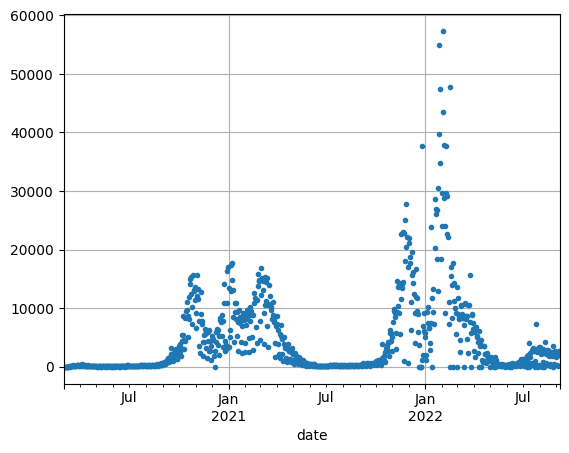

In [15]:
czech_cases['new_cases'].plot(style='.',grid=True)

<AxesSubplot:xlabel='date'>

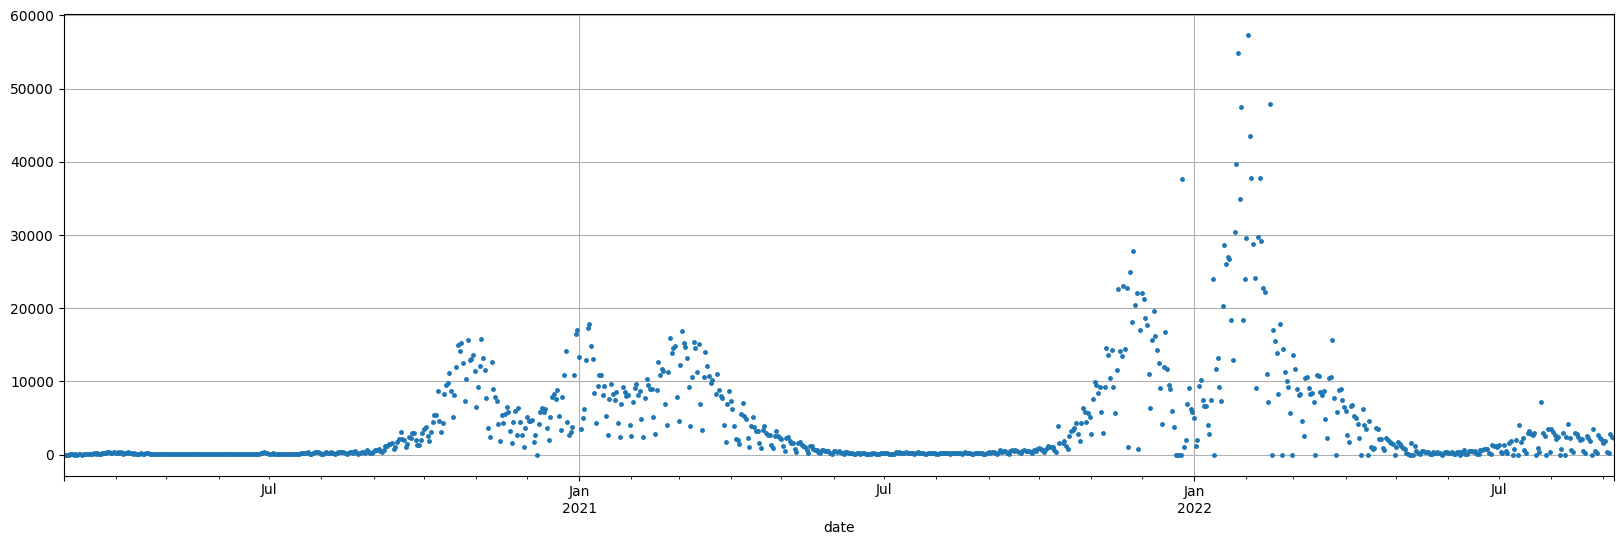

In [17]:
czech_cases['new_cases'].plot(**plotconfig)

## Indexing data
### Using `loc` - selecting based on index labels

In [23]:
czech_cases.index

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10',
               ...
               '2022-08-29', '2022-08-30', '2022-08-31', '2022-09-01',
               '2022-09-02', '2022-09-03', '2022-09-04', '2022-09-05',
               '2022-09-06', '2022-09-07'],
              dtype='datetime64[ns]', name='date', length=921, freq=None)

In [28]:
datetime.date(year = 2020, month = 3, day =1)

datetime.date(2020, 3, 1)

In [30]:
czech_cases.loc[datetime.datetime(year = 2020, month = 12, day =24)]

iso_code             CZE
new_cases        14149.0
new_deaths         112.0
icu_patients       749.0
hosp_patients     4310.0
Name: 2020-12-24 00:00:00, dtype: object

In [31]:
czech_cases.loc['2020-12-24']

iso_code             CZE
new_cases        14149.0
new_deaths         112.0
icu_patients       749.0
hosp_patients     4310.0
Name: 2020-12-24 00:00:00, dtype: object

<AxesSubplot:xlabel='date'>

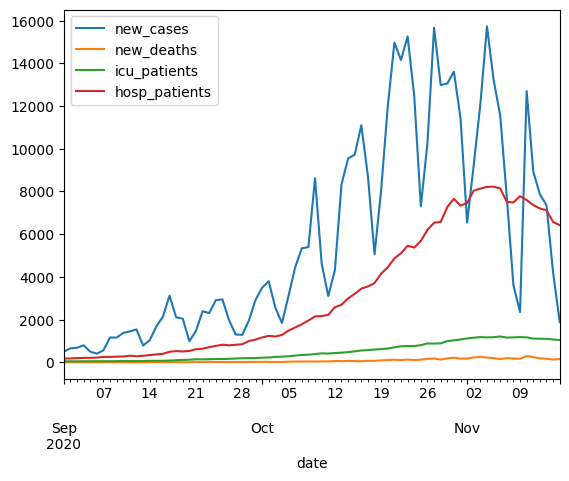

In [45]:
czech_cases.loc['2020-09-01':'2020-11-15'].plot()

### subsetting using `mask` - conditional on value of series

In [50]:
czech_cases[(czech_cases['new_cases'] >= 5000) & (czech_cases['new_cases'] < 15000)]

,iso_code,new_cases,new_deaths,icu_patients,hosp_patients
date,,,,,
2020-10-07,CZE,5338.0,35.0,346.0,1785.0
2020-10-08,CZE,5397.0,40.0,358.0,1956.0
2020-10-09,CZE,8617.0,36.0,389.0,2149.0
2020-10-13,CZE,8326.0,55.0,452.0,2692.0
2020-10-14,CZE,9543.0,66.0,478.0,2990.0
...,...,...,...,...,...
2022-04-04,CZE,6579.0,32.0,164.0,1866.0
2022-04-05,CZE,6729.0,29.0,167.0,1833.0
2022-04-06,CZE,5305.0,32.0,165.0,1740.0


<AxesSubplot:xlabel='date'>

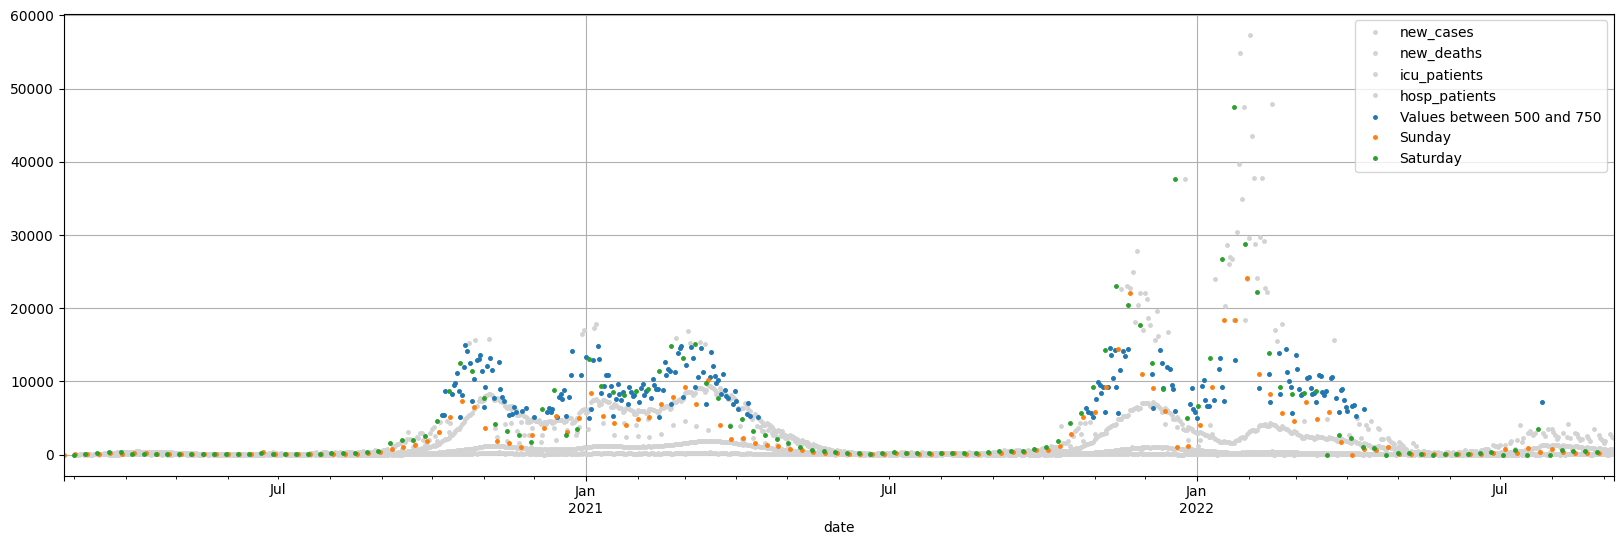

In [51]:
ax = czech_cases.plot(color = 'lightgrey',label='other values',legend=True,**plotconfig)
czech_cases.loc[(czech_cases['new_cases'] >= 5000) & (czech_cases['new_cases'] < 15000), 'new_cases'].plot(ax=ax,label='Values between 500 and 750',legend=True,**plotconfig)
czech_cases.loc[czech_cases.index.weekday == 6, 'new_cases'].plot(ax=ax,label='Sunday',legend=True,**plotconfig)
czech_cases.loc[czech_cases.index.weekday == 5,'new_cases'].plot(ax=ax,label='Saturday',legend=True,**plotconfig)

In [52]:
covid

,iso_code,date,new_cases,new_deaths,icu_patients,hosp_patients
0,ABW,2020-03-13,2.0,NaN,NaN,NaN
1,ABW,2020-03-14,0.0,NaN,NaN,NaN
2,ABW,2020-03-15,0.0,NaN,NaN,NaN
3,ABW,2020-03-16,0.0,NaN,NaN,NaN
4,ABW,2020-03-17,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...
201112,ZWE,2022-09-03,11.0,0.0,NaN,NaN
201113,ZWE,2022-09-04,8.0,0.0,NaN,NaN
201114,ZWE,2022-09-05,6.0,0.0,NaN,NaN
201115,ZWE,2022-09-06,13.0,0.0,NaN,NaN


In [65]:
CSSR = covid.loc[covid['iso_code'].isin(['SVK','CZE'])] 

## `MultiIndex`

In [66]:
CSSR = CSSR.set_index(['iso_code','date']) 

In [68]:
CSSR.loc[('CZE','2020-12-24')]

new_cases        14149.0
new_deaths         112.0
icu_patients       749.0
hosp_patients     4310.0
Name: (CZE, 2020-12-24 00:00:00), dtype: float64

if slicing or multi-selecting use `idx = pd.IndexSlice`

In [73]:
CSSR.index.get_level_values('date')

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10',
               ...
               '2022-08-29', '2022-08-30', '2022-08-31', '2022-09-01',
               '2022-09-02', '2022-09-03', '2022-09-04', '2022-09-05',
               '2022-09-06', '2022-09-07'],
              dtype='datetime64[ns]', name='date', length=1837, freq=None)

In [75]:
czechoslovak_christmas = CSSR.loc[pd.IndexSlice[['CZE','SVK'],'2020-12-24':'2020-12-27'],:] #
czechoslovak_christmas

new_cases  new_deaths  icu_patients  hosp_patients
iso_code date                                                          
CZE      2020-12-24    14149.0       112.0         749.0         4310.0
         2020-12-25     4402.0        83.0         769.0         4386.0
         2020-12-26     2706.0        91.0         806.0         4651.0
         2020-12-27     3030.0        94.0         846.0         4966.0
SVK      2020-12-24     7354.0        46.0         190.0         1947.0
         2020-12-25     5064.0         0.0         197.0         2037.0
         2020-12-26     1182.0         0.0         202.0         2121.0
         2020-12-27     1086.0        41.0         218.0         2238.0

* alternatively use notation below with `slice()`

In [82]:
CSSR.loc[(['CZE','SVK'],slice(None))]

new_cases  new_deaths  icu_patients  hosp_patients
iso_code date                                                          
CZE      2020-03-01        3.0         NaN           NaN            NaN
         2020-03-02        0.0         NaN           NaN            NaN
         2020-03-03        2.0         NaN           NaN            NaN
         2020-03-04        3.0         NaN           NaN            NaN
         2020-03-05        4.0         NaN           NaN            NaN
...                        ...         ...           ...            ...
SVK      2022-09-03        0.0         0.0          24.0          364.0
         2022-09-04        0.0         0.0          26.0          380.0
         2022-09-05        0.0         0.0           NaN            NaN
         2022-09-06        0.0         0.0           NaN            NaN
         2022-09-07        0.0         0.0           NaN            NaN

[1837 rows x 4 columns]

In [85]:
# you can create custom multiindex, not only set it up using set_index 
pd.MultiIndex.from_arrays([[1,1],['a','2']])

MultiIndex([(1, 'a'),
            (1, '2')],
           )

In [88]:
# get specific level from multiindex
CSSR.index.get_level_values(level = 'iso_code') # or level = 0

Index(['CZE', 'CZE', 'CZE', 'CZE', 'CZE', 'CZE', 'CZE', 'CZE', 'CZE', 'CZE',
       ...
       'SVK', 'SVK', 'SVK', 'SVK', 'SVK', 'SVK', 'SVK', 'SVK', 'SVK', 'SVK'],
      dtype='object', name='iso_code', length=1837)

In [89]:
# .reset_index enables reseting only specific level
CSSR.reset_index(level = 'date')

,date,new_cases,new_deaths,icu_patients,hosp_patients
iso_code,,,,,
CZE,2020-03-01,3.0,NaN,NaN,NaN
CZE,2020-03-02,0.0,NaN,NaN,NaN
CZE,2020-03-03,2.0,NaN,NaN,NaN
CZE,2020-03-04,3.0,NaN,NaN,NaN
CZE,2020-03-05,4.0,NaN,NaN,NaN
...,...,...,...,...,...
SVK,2022-09-03,0.0,0.0,24.0,364.0
SVK,2022-09-04,0.0,0.0,26.0,380.0
SVK,2022-09-05,0.0,0.0,NaN,NaN


## Reshaping and pivoting

https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

### Reshape `pd.Series` into `pd.DataFrame`: `.unstack`

In [96]:
czechoslovak_christmas['new_cases'].unstack(level = 'iso_code')

iso_code,CZE,SVK
date,,
2020-12-24,14149.0,7354.0
2020-12-25,4402.0,5064.0
2020-12-26,2706.0,1182.0
2020-12-27,3030.0,1086.0


### Stack `pd.DataFrame` to `pd.Series`


In [99]:
CSSR.stack()

iso_code  date                  
CZE       2020-03-01  new_cases     3.0
          2020-03-02  new_cases     0.0
          2020-03-03  new_cases     2.0
          2020-03-04  new_cases     3.0
          2020-03-05  new_cases     4.0
                                   ... 
SVK       2022-09-05  new_deaths    0.0
          2022-09-06  new_cases     0.0
                      new_deaths    0.0
          2022-09-07  new_cases     0.0
                      new_deaths    0.0
Length: 7248, dtype: float64

### melting -> long format

In [108]:
CSSR = CSSR.reset_index()

In [110]:
CSSR.melt().head()

,variable,value
0,iso_code,CZE
1,iso_code,CZE
2,iso_code,CZE
3,iso_code,CZE
4,iso_code,CZE


In [116]:
CSSR.melt()['variable'].unique()

array(['iso_code', 'date', 'new_cases', 'new_deaths', 'icu_patients',
       'hosp_patients'], dtype=object)

## Applying functions

#### Aggregation
- decreasing dimensionality

In [117]:
czech_cases.mean()

C:\Users\Martin Hronec\AppData\Local\Temp\ipykernel_27088\1289622617.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  czech_cases.mean()


new_cases        4415.203482
new_deaths         46.125141
icu_patients      368.860927
hosp_patients    2229.001098
dtype: float64

In [118]:
czech_cases.min()

iso_code         CZE
new_cases        0.0
new_deaths       0.0
icu_patients     3.0
hosp_patients    2.0
dtype: object

In [119]:
czech_cases.sum()

iso_code         CZECZECZECZECZECZECZECZECZECZECZECZECZECZECZEC...
new_cases                                                4057572.0
new_deaths                                                 40913.0
icu_patients                                              334188.0
hosp_patients                                            2030620.0
dtype: object

### Transforming
* preserves dimensionality and shape

In [125]:
czech_cases = czech_cases.set_index('iso_code', append = True)

In [128]:
czech_cases.diff(axis = 0)

,,new_cases,new_deaths,icu_patients,hosp_patients
date,iso_code,,,,
2020-03-01,CZE,NaN,NaN,NaN,NaN
2020-03-02,CZE,-3.0,NaN,NaN,NaN
2020-03-03,CZE,2.0,NaN,NaN,NaN
2020-03-04,CZE,1.0,NaN,NaN,NaN
2020-03-05,CZE,1.0,NaN,NaN,NaN
...,...,...,...,...,...
2022-09-03,CZE,-1479.0,-5.0,-2.0,-105.0
2022-09-04,CZE,-200.0,1.0,-2.0,23.0
2022-09-05,CZE,2582.0,3.0,9.0,109.0


In [129]:
czech_cases.apply(np.log)

,,new_cases,new_deaths,icu_patients,hosp_patients
date,iso_code,,,,
2020-03-01,CZE,1.098612,NaN,NaN,NaN
2020-03-02,CZE,-inf,NaN,NaN,NaN
2020-03-03,CZE,0.693147,NaN,NaN,NaN
2020-03-04,CZE,1.098612,NaN,NaN,NaN
2020-03-05,CZE,1.386294,NaN,NaN,NaN
...,...,...,...,...,...
2022-09-03,CZE,5.937536,0.693147,3.912023,6.428105
2022-09-04,CZE,5.187386,1.098612,3.871201,6.464588
2022-09-05,CZE,7.923348,1.791759,4.043051,6.621406


In [130]:
czech_cases.cumsum()

,,new_cases,new_deaths,icu_patients,hosp_patients
date,iso_code,,,,
2020-03-01,CZE,3.0,NaN,NaN,NaN
2020-03-02,CZE,3.0,NaN,NaN,NaN
2020-03-03,CZE,5.0,NaN,NaN,NaN
2020-03-04,CZE,8.0,NaN,NaN,NaN
2020-03-05,CZE,12.0,NaN,NaN,NaN
...,...,...,...,...,...
2022-09-03,CZE,4049887.0,40878.0,333977.0,2027768.0
2022-09-04,CZE,4050066.0,40881.0,334025.0,2028410.0
2022-09-05,CZE,4052827.0,40887.0,334082.0,2029161.0


In [131]:
czech_cases.pct_change()

,,new_cases,new_deaths,icu_patients,hosp_patients
date,iso_code,,,,
2020-03-01,CZE,NaN,NaN,NaN,NaN
2020-03-02,CZE,-1.000000,NaN,NaN,NaN
2020-03-03,CZE,inf,NaN,NaN,NaN
2020-03-04,CZE,0.500000,NaN,NaN,NaN
2020-03-05,CZE,0.333333,NaN,NaN,NaN
...,...,...,...,...,...
2022-09-03,CZE,-0.796017,-0.714286,-0.038462,-0.145028
2022-09-04,CZE,-0.527704,0.500000,-0.040000,0.037157
2022-09-05,CZE,14.424581,1.000000,0.187500,0.169782


#### Custom functions

In [134]:
czech_cases.apply(lambda series: (series - np.mean(series)) / np.std(series))

,,new_cases,new_deaths,icu_patients,hosp_patients
date,iso_code,,,,
2020-03-01,CZE,-0.627210,NaN,NaN,NaN
2020-03-02,CZE,-0.627637,NaN,NaN,NaN
2020-03-03,CZE,-0.627352,NaN,NaN,NaN
2020-03-04,CZE,-0.627210,NaN,NaN,NaN
2020-03-05,CZE,-0.627068,NaN,NaN,NaN
...,...,...,...,...,...
2022-09-03,CZE,-0.573760,-0.691793,-0.675474,-0.616278
2022-09-04,CZE,-0.602191,-0.676115,-0.679711,-0.607474
2022-09-05,CZE,-0.235151,-0.629081,-0.660645,-0.565751


## Group By

**Split-Apply-Combine Logic**

https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

* Splitting the data into groups based on some criteria.
* Applying a function to each group independently.
* Combining the results into a data structure.


In [136]:
countries.head()

,continent,location,population
iso_code,,,
ABW,North America,Aruba,106536.0
AFG,Asia,Afghanistan,40099462.0
AGO,Africa,Angola,34503774.0
AIA,North America,Anguilla,15753.0
ALB,Europe,Albania,2854710.0


In [146]:
covid =covid.merge(countries, how = 'left', on = 'iso_code')

In [147]:
covid.groupby('continent').median()

,new_cases,new_deaths,icu_patients,hosp_patients,population
continent,,,,,
Africa,9.0,0.0,124.0,4954.0,13461888.0
Asia,224.0,2.0,154.0,1197.0,19196465.0
Europe,314.0,4.0,113.0,646.0,5403021.0
North America,4.0,0.0,1086.0,6212.0,190338.0
Oceania,0.0,0.0,47.0,323.0,218764.0
South America,531.0,13.0,734.0,577.0,17797737.0


In [151]:
g = covid.groupby(['continent', 'date'])


In [152]:
g.groups.keys()

dict_keys([('Africa', Timestamp('2020-02-07 00:00:00')), ('Africa', Timestamp('2020-02-08 00:00:00')), ('Africa', Timestamp('2020-02-09 00:00:00')), ('Africa', Timestamp('2020-02-10 00:00:00')), ('Africa', Timestamp('2020-02-11 00:00:00')), ('Africa', Timestamp('2020-02-12 00:00:00')), ('Africa', Timestamp('2020-02-13 00:00:00')), ('Africa', Timestamp('2020-02-14 00:00:00')), ('Africa', Timestamp('2020-02-15 00:00:00')), ('Africa', Timestamp('2020-02-16 00:00:00')), ('Africa', Timestamp('2020-02-17 00:00:00')), ('Africa', Timestamp('2020-02-18 00:00:00')), ('Africa', Timestamp('2020-02-19 00:00:00')), ('Africa', Timestamp('2020-02-20 00:00:00')), ('Africa', Timestamp('2020-02-21 00:00:00')), ('Africa', Timestamp('2020-02-22 00:00:00')), ('Africa', Timestamp('2020-02-23 00:00:00')), ('Africa', Timestamp('2020-02-24 00:00:00')), ('Africa', Timestamp('2020-02-25 00:00:00')), ('Africa', Timestamp('2020-02-26 00:00:00')), ('Africa', Timestamp('2020-02-27 00:00:00')), ('Africa', Timestamp('2

In [153]:
g.groups.values()

dict_values([Int64Index([111143, 198367], dtype='int64'), Int64Index([111144, 198368], dtype='int64'), Int64Index([111145, 198369], dtype='int64'), Int64Index([111146, 198370], dtype='int64'), Int64Index([111147, 198371], dtype='int64'), Int64Index([111148, 198372], dtype='int64'), Int64Index([111149, 198373], dtype='int64'), Int64Index([52819, 111150, 198374], dtype='int64'), Int64Index([52820, 111151, 198375], dtype='int64'), Int64Index([52821, 111152, 198376], dtype='int64'), Int64Index([52822, 111153, 198377], dtype='int64'), Int64Index([52823, 111154, 198378], dtype='int64'), Int64Index([52824, 111155, 198379], dtype='int64'), Int64Index([52825, 111156, 198380], dtype='int64'), Int64Index([52826, 111157, 198381], dtype='int64'), Int64Index([52827, 111158, 198382], dtype='int64'), Int64Index([52828, 111159, 198383], dtype='int64'), Int64Index([52829, 111160, 198384], dtype='int64'), Int64Index([50972, 52830, 111161, 198385], dtype='int64'), Int64Index([50973, 52831, 111162, 198386]

### Group By + Apply

In [156]:
interesting_countries = ['Austria', 'Poland', 'Germany', 'Czechia', 'Slovakia', 'Hungary', 'France', 'Denmark', 'Sweden']

some_countries = covid[covid.location.isin(interesting_countries)]
some_countries['deaths_per_case'] = some_countries.new_deaths/some_countries.new_cases
some_countries

C:\Users\Martin Hronec\AppData\Local\Temp\ipykernel_27088\2047160843.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  some_countries['deaths_per_case'] = some_countries.new_deaths/some_countries.new_cases


,iso_code,date,new_cases,new_deaths,icu_patients,hosp_patients,continent,location,population,deaths_per_case
10225,AUT,2020-02-25,2.0,NaN,NaN,NaN,Europe,Austria,8922082.0,NaN
10226,AUT,2020-02-26,NaN,NaN,NaN,NaN,Europe,Austria,8922082.0,NaN
10227,AUT,2020-02-27,0.0,NaN,NaN,NaN,Europe,Austria,8922082.0,NaN
10228,AUT,2020-02-28,0.0,NaN,NaN,NaN,Europe,Austria,8922082.0,NaN
10229,AUT,2020-02-29,2.0,NaN,NaN,NaN,Europe,Austria,8922082.0,NaN
...,...,...,...,...,...,...,...,...,...,...
170491,SWE,2022-09-03,NaN,NaN,NaN,NaN,Europe,Sweden,10467097.0,NaN
170492,SWE,2022-09-04,NaN,NaN,NaN,NaN,Europe,Sweden,10467097.0,NaN
170493,SWE,2022-09-05,NaN,NaN,NaN,NaN,Europe,Sweden,10467097.0,NaN
170494,SWE,2022-09-06,NaN,NaN,NaN,NaN,Europe,Sweden,10467097.0,NaN


## Merging and joing datasets

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

* `pd.concat` - alignment (along index or columns)
* `pd.merge` - combining data (along columns, by values)
    * `df.join` - merge on index


### Concatenate
![concatenate](./img/concatenate.png)

### Merge
![merge](./img/merge.png)



* good to know when working with TS: `merge_as_of`

## Rolling object

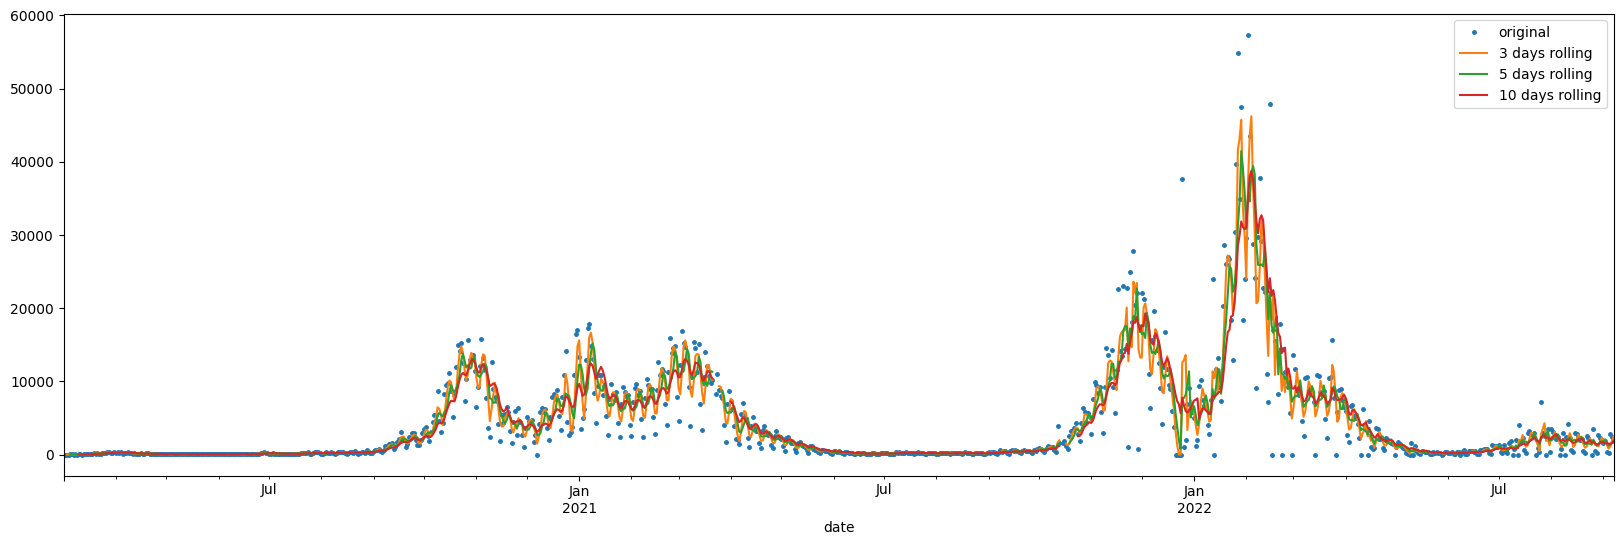

In [95]:
ax = czech_cases.plot(label='original',**plotconfig,legend=True)
czech_cases.rolling(3).mean().plot(label='3 days rolling',ax=ax,legend=True)
czech_cases.rolling(5).mean().plot(label='5 days rolling',ax=ax,legend=True)
czech_cases.rolling(10).mean().plot(label='10 days rolling',ax=ax,legend=True)